In [62]:
%load_ext autoreload
%autoreload 2

import sys
import pandas as pd

sys.path.append('/Users/lorenzostigliano/Documents/University/Imperial/Summer Term/thesis-imperial/src/')
sys.path.append('/Users/lorenzostigliano/Documents/University/Imperial/Summer Term/thesis-imperial/src/utils')
sys.path.append('/Users/lorenzostigliano/Documents/University/Imperial/Summer Term/thesis-imperial/src/models')

from utils.analysis import *
from utils.getters import * 
from utils.plotters import * 
from models_config.model_config_GSP import *
import matplotlib.pyplot as plt

plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]
params = {
    'text.usetex' : True,
    'font.size' : 11,
    'font.family' : 'lmodern'
}
plt.rcParams.update(params)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [135]:
def get_best_student_ensamble(model, view, dataset, CV, runs, dataset_split, analysis_type, model_args):
    import warnings
    warnings.filterwarnings('ignore')
    
    student_rep = []
    student_var = []

    # get the best reproducibility across all runs 
    for run in runs:

        mean_all_runs = []

        for student in range(model_args["n_students"]):
            view_rep, _ = view_reproducibility_analysis(
                dataset=dataset, 
                models=[model], 
                CV=CV, 
                views=[view], 
                run=run, 
                students=[student], 
                model_args=[model_args]
            )
            mean_all_runs.append(view_rep[0][0])
        #store the reproducibility score for all students for the run 
        student_rep.append(mean_all_runs)
    
    #get the mean and variance for the reproducibility scores for all the students
    student_var = np.var(student_rep, axis=0)
    student_rep = np.mean(student_rep, axis=0)

    #get the metrics of all the student models
    all_student_metrics_mean, _ = get_student_model_metric_all_folds(
        dataset=dataset, 
        model=model, 
        CV=CV, 
        runs=runs, 
        analysis_type=analysis_type, 
        dataset_split=dataset_split, 
        view=view, 
        model_args=model_args
    )
    
    #get the best model based soley on max reproducibility 
    best_rep_max = 0
    metric = 0
    student_max = -1
    for i, rep in enumerate(student_rep):
        if rep > metric:
            best_rep_max = rep 
            metric = rep
            student_max = i

    #get the best model based on max reproducibility and accuracy
    best_rep_acc = 0
    metric = 0
    student_acc_index = -1
    for i, rep in enumerate(student_rep):
        student_acc = all_student_metrics_mean[i][0]
        if (rep+student_acc)/2 > metric:
            metric = (rep+student_acc)/2 
            best_rep_acc = rep
            student_acc_index = i
    
    #get the best model based on max reproducibility and f1 score
    best_rep_f1 = 0
    metric = 0
    student_f1_index = -1
    for i, rep in enumerate(student_rep):
        student_f1 = all_student_metrics_mean[i][1]
        if (rep+student_f1)/2 > metric:
            metric = (rep+student_f1)/2 
            best_rep_f1 = rep
            student_f1_index = i
    
    return [best_rep_max, student_var[student_max], student_max], [best_rep_acc, student_var[student_acc_index], student_acc_index], [best_rep_f1, student_var[student_f1_index], student_f1_index]
    

In [136]:
def get_best_student_ensamble_detailed(model, view, CV, runs, dataset_split, analysis_type, model_args, dataset="gender_data"):
    import warnings
    warnings.filterwarnings('ignore')
    
    student_rep = []
    student_var = []

    # get the best reproducibility across all runs 
    for run in runs:

        mean_all_runs = []

        for student in range(model_args["n_students"]):
            view_rep, _ = view_reproducibility_analysis(
                dataset=dataset, 
                models=[model], 
                CV=CV, 
                views=[view], 
                run=run, 
                students=[student], 
                model_args=[model_args]
            )
            mean_all_runs.append(view_rep[0][0])
        #store the reproducibility score for all students for the run 
        student_rep.append(mean_all_runs)
    
    #get the mean and variance for the reproducibility scores for all the students
    student_var = np.var(student_rep, axis=0)
    student_rep = np.mean(student_rep, axis=0)

    #get the metrics of all the student models
    all_student_metrics_mean, all_student_metrics_var = get_student_model_metric_all_folds(
        dataset=dataset, 
        model=model, 
        CV=CV, 
        runs=runs, 
        analysis_type=analysis_type, 
        dataset_split=dataset_split, 
        view=view, 
        model_args=model_args
    )
    
    #get the best model based soley on max reproducibility 
    best_rep_max = 0
    metric = 0
    student_max = -1
    for i, rep in enumerate(student_rep):
        if rep > metric:
            best_rep_max = rep 
            metric = rep
            student_max = i

    #get the best model based on max accuracy
    best_max_acc = 0
    metric = 0
    student_max_acc_index = -1
    for i, rep in enumerate(student_rep):
        student_acc = all_student_metrics_mean[i][0]
        if student_acc > metric:
            metric = student_acc
            best_max_acc = rep
            student_max_acc_index = i

    #get the best model based on max reproducibility and f1 score
    best_max_f1 = 0
    metric = 0
    student_max_f1_index = -1
    for i, rep in enumerate(student_rep):
        student_f1 = all_student_metrics_mean[i][1]
        if student_f1 > metric:
            metric = student_f1
            best_max_f1 = rep
            student_max_f1_index = i

    #get the best model based on max reproducibility and accuracy
    best_rep_acc = 0
    metric = 0
    student_acc_index = -1
    for i, rep in enumerate(student_rep):
        student_acc = all_student_metrics_mean[i][0]
        if (rep+student_acc)/2 > metric:
            metric = (rep+student_acc)/2 
            best_rep_acc = rep
            student_acc_index = i
    
    #get the best model based on max reproducibility and f1 score
    best_rep_f1 = 0
    metric = 0
    student_f1_index = -1
    for i, rep in enumerate(student_rep):
        student_f1 = all_student_metrics_mean[i][1]
        if (rep+student_f1)/2 > metric:
            metric = (rep+student_f1)/2 
            best_rep_f1 = rep
            student_f1_index = i
    
    return all_student_metrics_mean, all_student_metrics_var, [[best_rep_max, student_var[student_max], student_max], [best_max_acc, student_var[student_max_acc_index], student_max_acc_index], [best_max_f1, student_var[student_max_f1_index], student_max_f1_index], [best_rep_acc, student_var[student_acc_index], student_acc_index], [best_rep_f1, student_var[student_f1_index], student_f1_index]]
    

# COMPARISON BETWEEN LSP AND LOGITS 

In [15]:
analysis_type="model_assessment"
dataset = "gender_data"
dataset_split="val"
models_args=[
    gcn_student_ensamble_2_args,
    gcn_student_ensamble_3_args,
    gcn_student_ensamble_4_args,
    gcn_student_ensamble_5_args,
    gcn_student_lsp_ensamble_2_args,
    gcn_student_lsp_ensamble_3_args,
    gcn_student_lsp_ensamble_4_args,
    gcn_student_lsp_ensamble_5_args,
    gcn_student_emb_ensamble_2_args,
    gcn_student_emb_ensamble_3_args,
    gcn_student_emb_ensamble_4_args,
    gcn_student_emb_ensamble_5_args
]

all_model_data_mean = []
all_model_data_std = []

for model_arg in models_args:
    
    model_data_mean = []
    model_data_std = []
    
    print(model_arg["model_name"])
    
    for view in [0,2,4,5]:
        
        rep = get_best_student_ensamble(
            model=model_arg["model_name"], 
            dataset=dataset,
            view=view, 
            CV=["3Fold", "5Fold", "10Fold"],
            runs=[i for i in range(10)], 
            analysis_type=analysis_type,
            dataset_split=dataset_split,
            model_args=model_arg
        )[1]
        model_data_mean.append(rep[0])
        model_data_std.append(rep[1])
    
    all_model_data_mean.append(model_data_mean)
    all_model_data_std.append(model_data_std)

gcn_student_ensamble_2
gcn_student_ensamble_3
gcn_student_ensamble_4
gcn_student_ensamble_5
gcn_student_lsp_ensamble_2
gcn_student_lsp_ensamble_3
gcn_student_lsp_ensamble_4
gcn_student_lsp_ensamble_5
gcn_student_emb_ensamble_2
gcn_student_emb_ensamble_3
gcn_student_emb_ensamble_4
gcn_student_emb_ensamble_5


In [16]:
df = pd.DataFrame(all_model_data_mean)

df_transposed = df.T
# Calculate the mean along each column
mean_row = df_transposed.mean()

# Add the mean row to the transposed DataFrame
df_transposed = df_transposed.append(mean_row, ignore_index=True)
print(df_transposed.head())

         0         1         2         3         4         5         6   \
0  0.940556  0.968750  0.972222  0.965278  0.938333  0.968333  0.960000   
1  0.929722  0.932083  0.953056  0.941667  0.944444  0.931944  0.968889   
2  0.943889  0.957778  0.961111  0.975556  0.957917  0.966667  0.965000   
3  0.946111  0.912639  0.955278  0.937778  0.933056  0.921667  0.969028   
4  0.940069  0.942813  0.960417  0.955069  0.943437  0.947153  0.965729   

         7         8         9         10        11  
0  0.958056  0.885833  0.914722  0.934306  0.928750  
1  0.978333  0.898750  0.928333  0.935556  0.938750  
2  0.977222  0.869583  0.913750  0.921667  0.907500  
3  0.933750  0.916806  0.941250  0.929444  0.959722  
4  0.961840  0.892743  0.924514  0.930243  0.933681  


In [36]:
df = pd.DataFrame(np.sqrt(all_model_data_std))

df_transposed_var = df.T
# Calculate the mean along each column
std_row = df_transposed_var.mean()

# Add the mean row to the transposed DataFrame
df_std_transposed = df_transposed_var.append(std_row, ignore_index=True)
df_std_transposed

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.022229,0.004270,0.017213,0.024256,0.018584,0.007265,0.019173,0.020230,0.060816,0.050186,0.054013,0.043444
1,0.018934,0.028467,0.022608,0.015726,0.019355,0.014055,0.007713,0.008498,0.083801,0.043133,0.048759,0.038871
2,0.026074,0.010323,0.011785,0.014530,0.017624,0.008607,0.011055,0.009027,0.066363,0.041156,0.060385,0.055064
3,0.019011,0.018028,0.011749,0.019343,0.018276,0.009091,0.013945,0.019355,0.057091,0.051333,0.028190,0.031975
4,0.021562,0.015272,0.015839,0.018464,0.018460,0.009754,0.012972,0.014278,0.067018,0.046452,0.047837,0.042339


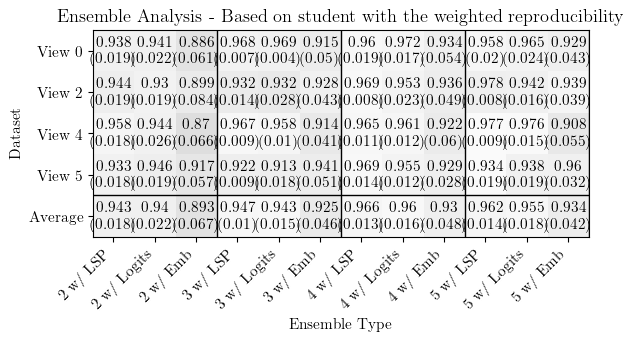

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Change the order of the DataFrame columns
column_order = [4, 0, 8, 5, 1, 9, 6, 2, 10, 7, 3, 11]
df_ordered = df_transposed.iloc[:, column_order]
df_std_ordered = df_std_transposed.iloc[:, column_order]

# Create a white heatmap with a grayscale colormap
plt.imshow(df_ordered.values, cmap='gray', extent=[-0.5, df_ordered.shape[1] - 0.5, -0.5, df_ordered.shape[0] - 0.5], vmin=0, vmax=1)

# Find the maximum value for each pair of rows and round to 3 significant figures
max_values = []
for i in range(0, df.shape[0], 2):
    pair_max = max(df.iloc[i:i+2])
    pair_max_rounded = round(pair_max, 3)
    max_values.append(pair_max_rounded)

# Iterate over the DataFrame and highlight the maximum value for each pair in the "Average" row
for i in range(df_ordered.shape[0]):
    for j in range(df_ordered.shape[1]):
        value = round(df_ordered.values[i, j], 3)  # Round to 3 significant figures
        std = round(df_std_ordered.values[i, j], 3)  # Round standard deviation to 3 significant figures
        if i == 4 and value in max_values:
            plt.text(j, i, f'{value}\n({std})', ha='center', va='center', color='black', weight='bold')
        else:
            plt.text(j, i, f'{value}\n({std})', ha='center', va='center', color='black')



plt.axhline(3.5, color='black', linewidth=1)  # Add a horizontal line on top of the "Average" row

# Add vertical lines spaced 2 cells apart
for j in range(2, df_ordered.shape[1], 3):
    plt.axvline(j + 0.5, color='black', linewidth=1)  # Add a vertical line in the middle of each pair


plt.gca().invert_yaxis()  # Reverse the y-axis

# Add custom labels to the y-axis
labels = ['View 0', 'View 2', 'View 4', 'View 5', 'Average']
plt.yticks(range(df_ordered.shape[0]), labels)

# Add custom labels to the x-axis
x_ticks = ['2 w/ LSP', '2 w/ Logits', '2 w/ Emb', '3 w/ LSP', '3 w/ Logits', '3 w/ Emb', '4 w/ LSP', '4 w/ Logits', '4 w/ Emb', '5 w/ LSP', '5 w/ Logits', '5 w/ Emb']
plt.xticks(range(df_ordered.shape[1]), x_ticks, rotation=45, ha='right')

# Add title and axis labels
plt.title('Ensemble Analysis - Based on student with the weighted reproducibility')
plt.xlabel('Ensemble Type')
plt.ylabel('Dataset')
if not os.path.exists(SAVE_DIR_FIGS+"ensemble_results/"):
    os.makedirs(SAVE_DIR_FIGS+"ensemble_results/")
plt.savefig(SAVE_DIR_FIGS+"ensemble_results/"+'Ensemble Analysis - Based on student with the average reproducibility'+".png", dpi=150,bbox_inches='tight')

plt.show()


In [38]:
df_ordered*100

,4,0,8,5,1,9,6,2,10,7,3,11
0,93.833333,94.055556,88.583333,96.833333,96.875000,91.472222,96.000000,97.222222,93.430556,95.805556,96.527778,92.875000
1,94.444444,92.972222,89.875000,93.194444,93.208333,92.833333,96.888889,95.305556,93.555556,97.833333,94.166667,93.875000
2,95.791667,94.388889,86.958333,96.666667,95.777778,91.375000,96.500000,96.111111,92.166667,97.722222,97.555556,90.750000
3,93.305556,94.611111,91.680556,92.166667,91.263889,94.125000,96.902778,95.527778,92.944444,93.375000,93.777778,95.972222
4,94.343750,94.006944,89.274306,94.715278,94.281250,92.451389,96.572917,96.041667,93.024306,96.184028,95.506944,93.368056


In [39]:
df_std_ordered*100

,4,0,8,5,1,9,6,2,10,7,3,11
0,1.858414,2.222917,6.081621,0.726483,0.426956,5.018561,1.917270,1.721326,5.401349,2.023016,2.425590,4.344381
1,1.935495,1.893377,8.380066,1.405457,2.846680,4.313255,0.771302,2.260777,4.875851,0.849837,1.572576,3.887128
2,1.762357,2.607415,6.636346,0.860663,1.032272,4.115637,1.105542,1.178511,6.038457,0.902671,1.452966,5.506450
3,1.827643,1.901104,5.709144,0.909059,1.802829,5.133274,1.394503,1.174905,2.819000,1.935545,1.934299,3.197462
4,1.845977,2.156203,6.701794,0.975416,1.527185,4.645182,1.297154,1.583880,4.783664,1.427767,1.846358,4.233855


In [26]:
analysis_type="model_assessment"
dataset_split="val"
models_args=[
    gcn_student_ensamble_2_args,
    gcn_student_ensamble_3_args,
    gcn_student_ensamble_4_args,
    gcn_student_ensamble_5_args,
    gcn_student_lsp_ensamble_2_args,
    gcn_student_lsp_ensamble_3_args,
    gcn_student_lsp_ensamble_4_args,
    gcn_student_lsp_ensamble_5_args,
    gcn_student_emb_ensamble_2_args,
    gcn_student_emb_ensamble_3_args,
    gcn_student_emb_ensamble_4_args,
    gcn_student_emb_ensamble_5_args
]

all_model_metrics_mean = []
all_model_metrics_var = []
all_model_best_student = []

for model_arg in models_args:
    
    print(model_arg["model_name"])

    model_metrics_mean = []
    model_metrics_var = []
    model_best_student = []

    for view in [0,2,4,5]:
        mean, var, best_students = get_best_student_ensamble_detailed(
            model=model_arg["model_name"], 
            view=view, 
            CV=["3Fold", "5Fold", "10Fold"],
            runs=[i for i in range(10)], 
            analysis_type=analysis_type,
            dataset_split=dataset_split,
            model_args=model_arg
        )
        print(best_students)
        model_metrics_mean.append(mean)
        model_metrics_var.append(var)
        model_best_student.append(best_students)

    all_model_metrics_mean.append(model_metrics_mean)
    all_model_metrics_var.append(model_metrics_var)
    all_model_best_student.append(model_best_student)

gcn_student_ensamble_2
[[0.9405555555555555, 0.000494135802469136, 0], [0.9405555555555555, 0.000494135802469136, 0], [0.9156944444444445, 0.0005571180555555544, 1], [0.9405555555555555, 0.000494135802469136, 0], [0.9156944444444445, 0.0005571180555555544, 1]]
[[0.9297222222222221, 0.0003584876543209886, 0], [0.8902777777777778, 0.0001358024691358015, 1], [0.8902777777777778, 0.0001358024691358015, 1], [0.9297222222222221, 0.0003584876543209886, 0], [0.8902777777777778, 0.0001358024691358015, 1]]
[[0.943888888888889, 0.0006798611111111126, 1], [0.943888888888889, 0.0006798611111111126, 1], [0.943888888888889, 0.0006798611111111126, 1], [0.943888888888889, 0.0006798611111111126, 1], [0.943888888888889, 0.0006798611111111126, 1]]
[[0.946111111111111, 0.000361419753086421, 1], [0.946111111111111, 0.000361419753086421, 1], [0.946111111111111, 0.000361419753086421, 1], [0.946111111111111, 0.000361419753086421, 1], [0.946111111111111, 0.000361419753086421, 1]]
gcn_student_ensamble_3
[[0.9687

In [49]:
df_best_student = np.array(all_model_best_student)
df = []
for i in range(4):
    df.append(df_best_student[:, i, :, 0].flatten())
df = pd.DataFrame(np.array(df))
# Calculate the mean of columns
mean_row = df.mean(axis=0)

# Append the mean row to the DataFrame
df = df.append(mean_row, ignore_index=True).T
index_values = ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'] * (len(df) // 5) + ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'][:len(df) % 5]

# Assign the new index to the DataFrame
df.index = index_values
df.shape

(60, 5)

In [50]:
index = df_best_student[:,:,:,2]
all_data_accuracy = []
for view_index in range(4):
    view_data = []
    ensamble_indexes = index[:,view_index,:]
    ensamble_data = np.array(all_model_metrics_mean)[:,view_index]
    #number of ensembles 
    for i in range(12):
        view_data.append([ensamble_data[i][int(best_student_index)][0] for best_student_index in ensamble_indexes[i]])
    all_data_accuracy.append(np.array(view_data).flatten())

In [51]:
all_data_var = []
for view_index in range(4):
    view_data = []
    ensamble_indexes = index[:,view_index,:]
    ensamble_data = np.array(all_model_metrics_var)[:,view_index]
    #number of ensembles 
    for i in range(12):
        view_data.append([ensamble_data[i][int(best_student_index)][0] for best_student_index in ensamble_indexes[i]])
    all_data_var.append(np.array(view_data).flatten())

In [52]:
df_acuracy = pd.DataFrame(np.array(all_data_accuracy))
# Calculate the mean of columns
mean_row = df_acuracy.mean(axis=0)

# Append the mean row to the DataFrame
df_acuracy = df_acuracy.append(mean_row, ignore_index=True).T
# Create the list of repeating index values
index_values = ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'] * (len(df_acuracy) // 5) + ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'][:len(df_acuracy) % 5]

# Assign the new index to the DataFrame
df_acuracy.index = index_values
df_acuracy.shape

(60, 5)

In [53]:
df_var = pd.DataFrame(np.array(all_data_var))
# Calculate the mean of columns
mean_row = df_var.mean(axis=0)

# Append the mean row to the DataFrame
df_var = df_var.append(mean_row, ignore_index=True).T
# Create the list of repeating index values
index_values = ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'] * (len(df_var) // 5) + ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'][:len(df_var) % 5]

# Assign the new index to the DataFrame
df_var.index = index_values
df_var.shape

(60, 5)

In [54]:
df_acuracy = df_acuracy.loc['weighted acc'].T
df_var = df_var.loc['weighted acc'].T
df_var = np.sqrt(df_var)

In [55]:
import pandas as pd

# Assuming you have a DataFrame called 'df' with the given data

# Define the new column labels
new_labels = ['2 w/ Logits', '3 w/ Logits', '4 w/ Logits','5 w/ Logits', '2 w/ LSP', '3 w/ LSP', '4 w/ LSP',  '5 w/ LSP', '2 w/ Emb', '3 w/ Emb', '4 w/ Emb', '5 w/ Emb']
# Rename the columns using the new labels
df_acuracy.columns = new_labels
df_var.columns = new_labels

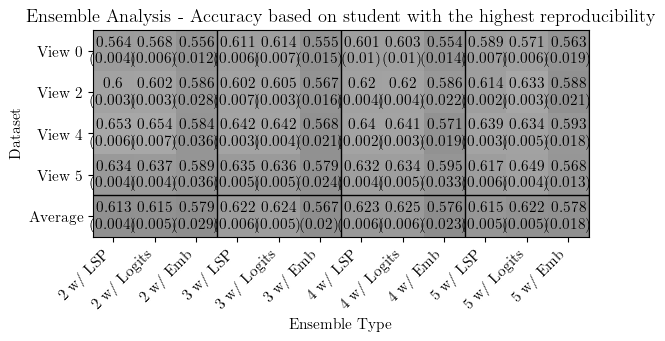

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Change the order of the DataFrame columns
column_order = [4, 0, 8, 5, 1, 9, 6, 2, 10, 7, 3, 11]
df_ordered = df_acuracy.iloc[:, column_order]
df_std_ordered = df_var.iloc[:, column_order]
# Create a white heatmap with a grayscale colormap
plt.imshow(df_ordered.values, cmap='gray', extent=[-0.5, df_ordered.shape[1] - 0.5, -0.5, df_ordered.shape[0] - 0.5], vmin=0, vmax=1)

# Find the maximum value for each pair of rows and round to 3 significant figures
max_values = []
for i in range(0, df_ordered.T.shape[0], 2):
    pair_max = max(df_ordered.iloc[4].iloc[i:i+2])
    pair_max_rounded = round(pair_max, 3)
    max_values.append(pair_max_rounded)
    
# Iterate over the DataFrame and highlight the maximum value for each pair in the "Average" row
for i in range(df_ordered.shape[0]):
    for j in range(df_ordered.shape[1]):
        value = round(df_ordered.values[i, j], 3)  # Round to 3 significant figures
        std = round(df_std_ordered.values[i, j], 3)  # Round standard deviation to 3 significant figures
        if i == 4 and value in max_values:
            plt.text(j, i, f'{value}\n({std})', ha='center', va='center', color='black', weight='bold')
        else:
            plt.text(j, i, f'{value}\n({std})', ha='center', va='center', color='black')

plt.axhline(3.5, color='black', linewidth=1)  # Add a horizontal line on top of the "Average" row

# Add vertical lines spaced 2 cells apart
for j in range(2, df_ordered.shape[1], 3):
    plt.axvline(j + 0.5, color='black', linewidth=1)  # Add a vertical line in the middle of each pair


plt.gca().invert_yaxis()  # Reverse the y-axis

# Add custom labels to the y-axis
labels = ['View 0', 'View 2', 'View 4', 'View 5', 'Average']
plt.yticks(range(df_ordered.shape[0]), labels)

# Add custom labels to the x-axis
x_ticks = ['2 w/ LSP', '2 w/ Logits', '2 w/ Emb', '3 w/ LSP', '3 w/ Logits', '3 w/ Emb', '4 w/ LSP', '4 w/ Logits', '4 w/ Emb','5 w/ LSP', '5 w/ Logits', '5 w/ Emb']
plt.xticks(range(df_ordered.shape[1]), x_ticks, rotation=45, ha='right')

# Add title and axis labels
plt.title('Ensemble Analysis - Accuracy based on student with the highest reproducibility')
plt.xlabel('Ensemble Type')
plt.ylabel('Dataset')

if not os.path.exists(SAVE_DIR_FIGS+"ensemble_results/"):
    os.makedirs(SAVE_DIR_FIGS+"ensemble_results/")
plt.savefig(SAVE_DIR_FIGS+"ensemble_results/"+'Ensemble Analysis - Accuracy based on student with the weighted reproducibility'+".png", dpi=150,bbox_inches='tight')

plt.show()

In [57]:
df_ordered*100

,2 w/ LSP,2 w/ Logits,2 w/ Emb,3 w/ LSP,3 w/ Logits,3 w/ Emb,4 w/ LSP,4 w/ Logits,4 w/ Emb,5 w/ LSP,5 w/ Logits,5 w/ Emb
0,56.387557,56.778634,55.599638,61.133945,61.354159,55.499397,60.130316,60.327069,55.378442,58.920296,57.110477,56.259082
1,60.037766,60.214470,58.570733,60.162045,60.474145,56.700481,61.953215,62.048395,58.580349,61.428053,63.254717,58.754880
2,65.347478,65.388880,58.411403,64.189036,64.230411,56.819584,64.023050,64.092642,57.078241,63.883251,63.364842,59.312146
3,63.360231,63.747548,58.861465,63.470824,63.574188,57.856217,63.190064,63.421384,59.458089,61.735141,64.913467,56.770380
4,61.283258,61.532383,57.860810,62.238962,62.408226,56.718920,62.324161,62.472372,57.623781,61.491685,62.160876,57.774122


In [59]:
df_std_ordered*100

,2 w/ LSP,2 w/ Logits,2 w/ Emb,3 w/ LSP,3 w/ Logits,3 w/ Emb,4 w/ LSP,4 w/ Logits,4 w/ Emb,5 w/ LSP,5 w/ Logits,5 w/ Emb
0,0.421290,0.564662,1.159347,0.599942,0.741391,1.547037,0.960210,1.026597,1.431280,0.725066,0.605979,1.895219
1,0.308422,0.258683,2.753932,0.732203,0.336844,1.635694,0.414608,0.357395,2.206614,0.237379,0.336649,2.120590
2,0.571642,0.662559,3.556915,0.291194,0.416586,2.128846,0.240506,0.268195,1.927012,0.288252,0.534694,1.788582
3,0.375402,0.420181,3.589633,0.535064,0.492942,2.439152,0.394778,0.466891,3.265889,0.581666,0.374800,1.266185
4,0.430207,0.500324,2.935359,0.562836,0.519534,1.971691,0.571751,0.606537,2.307440,0.500873,0.476161,1.795203


# BreastMNSIT

In [87]:
from models_config.model_config_BreastMNIST import *

analysis_type="model_assessment"
dataset = "BreastMNIST"
dataset_split="val"
models_args=[
    gcn_student_ensamble_2_BreastMNIST_args,
    gcn_student_ensamble_3_BreastMNIST_args,
    gcn_student_ensamble_4_BreastMNIST_args,
    gcn_student_ensamble_5_BreastMNIST_args,
    gcn_student_lsp_ensamble_2_BreastMNIST_args,
    gcn_student_lsp_ensamble_3_BreastMNIST_args,
    gcn_student_lsp_ensamble_4_BreastMNIST_args,
    gcn_student_lsp_ensamble_5_BreastMNIST_args,
    gcn_student_emb_ensamble_3_BreastMNIST_args
]

all_model_data_mean = []
all_model_data_std = []

for model_arg in models_args:
    
    model_data_mean = []
    model_data_std = []
    
    print(model_arg["model_name"])
    
    for view in [-1]:
        
        rep = get_best_student_ensamble(
            model=model_arg["model_name"], 
            dataset=dataset,
            view=view, 
            CV=["3Fold", "5Fold", "10Fold"],
            runs=[i for i in range(10)], 
            analysis_type=analysis_type,
            dataset_split=dataset_split,
            model_args=model_arg
        )[1]
        model_data_mean.append(rep[0])
        model_data_std.append(rep[1])
    
    all_model_data_mean.append(model_data_mean)
    all_model_data_std.append(model_data_std)

gcn_student_ensamble_2
gcn_student_ensamble_3
gcn_student_ensamble_4
gcn_student_ensamble_5
gcn_student_lsp_ensamble_2
gcn_student_lsp_ensamble_3
gcn_student_lsp_ensamble_4
gcn_student_lsp_ensamble_5
gcn_student_emb_ensamble_3


In [88]:
df = pd.DataFrame(all_model_data_mean)

df_transposed = df.T
# Calculate the mean along each column
mean_row = df_transposed.mean()

# Add the mean row to the transposed DataFrame
df_transposed = df_transposed.append(mean_row, ignore_index=True)
print(df_transposed.head())

          0         1         2     3         4       5         6         7  \
0  0.957778  0.961389  0.929167  0.94  0.944583  0.9675  0.931389  0.932778   
1  0.957778  0.961389  0.929167  0.94  0.944583  0.9675  0.931389  0.932778   

          8  
0  0.927361  
1  0.927361  


In [89]:
df = pd.DataFrame(np.sqrt(all_model_data_std))

df_transposed_var = df.T
# Calculate the mean along each column
std_row = df_transposed.std()

# Add the mean row to the transposed DataFrame
df_std_transposed = df_transposed_var.append(std_row, ignore_index=True)
df_std_transposed

,0,1,2,3,4,5,6,7,8
0,0.020443,0.01773,0.024383,0.03108,0.019548,0.01449,0.02032,0.023694,0.040716
1,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000


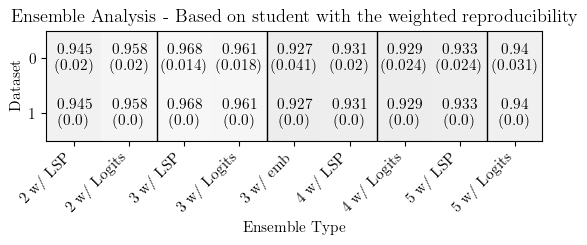

In [90]:
import matplotlib.pyplot as plt
import numpy as np

# Change the order of the DataFrame columns
column_order = [4, 0, 5, 1, 8, 6, 2, 7, 3]
df_ordered = df_transposed.iloc[:, column_order]
df_std_ordered = df_std_transposed.iloc[:, column_order]

# Create a white heatmap with a grayscale colormap
plt.imshow(df_ordered.values, cmap='gray', extent=[-0.5, df_ordered.shape[1] - 0.5, -0.5, df_ordered.shape[0] - 0.5], vmin=0, vmax=1)

# Find the maximum value for each pair of rows and round to 3 significant figures
max_values = []
for i in range(0, df.shape[0], 2):
    pair_max = max(df.iloc[i:i+2])
    pair_max_rounded = round(pair_max, 3)
    max_values.append(pair_max_rounded)

# Iterate over the DataFrame and highlight the maximum value for each pair in the "Average" row
for i in range(df_ordered.shape[0]):
    for j in range(df_ordered.shape[1]):
        value = round(df_ordered.values[i, j], 3)  # Round to 3 significant figures
        std = round(df_std_ordered.values[i, j], 3)  # Round standard deviation to 3 significant figures
        if i == 4 and value in max_values:
            plt.text(j, i, f'{value}\n({std})', ha='center', va='center', color='black', weight='bold')
        else:
            plt.text(j, i, f'{value}\n({std})', ha='center', va='center', color='black')

# Add vertical lines spaced 2 cells apart
for j in range(1, df_ordered.shape[1], 2):
    plt.axvline(j + 0.5, color='black', linewidth=1)  # Add a vertical line in the middle of each pair


plt.gca().invert_yaxis()  # Reverse the y-axis

# Add custom labels to the x-axis
x_ticks = [ '2 w/ LSP', '2 w/ Logits', '3 w/ LSP','3 w/ Logits', '3 w/ emb', '4 w/ LSP', '4 w/ Logits', '5 w/ LSP', '5 w/ Logits']
plt.xticks(range(df_ordered.shape[1]), x_ticks, rotation=45, ha='right')

# Add title and axis labels
plt.title('Ensemble Analysis - Based on student with the weighted reproducibility')
plt.xlabel('Ensemble Type')
plt.ylabel('Dataset')
if not os.path.exists(SAVE_DIR_FIGS+"ensemble_results/"):
    os.makedirs(SAVE_DIR_FIGS+"ensemble_results/")
plt.savefig(SAVE_DIR_FIGS+"ensemble_results/"+'Ensemble Analysis - Based on student with the average reproducibility'+".png", dpi=150,bbox_inches='tight')

plt.show()


In [91]:
analysis_type="model_assessment"
dataset_split="val"
models_args=[
    gcn_student_ensamble_2_BreastMNIST_args,
    gcn_student_ensamble_3_BreastMNIST_args,
    gcn_student_ensamble_4_BreastMNIST_args,
    gcn_student_ensamble_5_BreastMNIST_args,
    gcn_student_lsp_ensamble_2_BreastMNIST_args,
    gcn_student_lsp_ensamble_3_BreastMNIST_args,
    gcn_student_lsp_ensamble_4_BreastMNIST_args,
    gcn_student_lsp_ensamble_5_BreastMNIST_args,
    gcn_student_emb_ensamble_3_BreastMNIST_args
]

all_model_metrics_mean = []
all_model_metrics_var = []
all_model_best_student = []

for model_arg in models_args:
    
    print(model_arg["model_name"])

    model_metrics_mean = []
    model_metrics_var = []
    model_best_student = []

    for view in [-1]:
        mean, var, best_students = get_best_student_ensamble_detailed(
            model=model_arg["model_name"], 
            view=view, 
            CV=["3Fold", "5Fold", "10Fold"],
            runs=[i for i in range(10)], 
            analysis_type=analysis_type,
            dataset_split=dataset_split,
            model_args=model_arg,
            dataset=dataset
        )
        print(best_students)
        model_metrics_mean.append(mean)
        model_metrics_var.append(var)
        model_best_student.append(best_students)

    all_model_metrics_mean.append(model_metrics_mean)
    all_model_metrics_var.append(model_metrics_var)
    all_model_best_student.append(model_best_student)

gcn_student_ensamble_2
[[0.957777777777778, 0.0004179012345679009, 1], [0.957777777777778, 0.0004179012345679009, 1], [0.957777777777778, 0.0004179012345679009, 1], [0.957777777777778, 0.0004179012345679009, 1], [0.957777777777778, 0.0004179012345679009, 1]]
gcn_student_ensamble_3
[[0.9613888888888891, 0.00031435185185185374, 1], [0.9613888888888891, 0.00031435185185185374, 1], [0.9613888888888891, 0.00031435185185185374, 1], [0.9613888888888891, 0.00031435185185185374, 1], [0.9613888888888891, 0.00031435185185185374, 1]]
gcn_student_ensamble_4
[[0.9479166666666667, 0.001057966820987654, 0], [0.9291666666666668, 0.0005945216049382705, 3], [0.9291666666666668, 0.0005945216049382705, 3], [0.9291666666666668, 0.0005945216049382705, 3], [0.9291666666666668, 0.0005945216049382705, 3]]
gcn_student_ensamble_5
[[0.9415277777777777, 0.00144577546296296, 2], [0.9400000000000001, 0.000965972222222224, 3], [0.9400000000000001, 0.000965972222222224, 3], [0.9400000000000001, 0.000965972222222224, 3]

In [92]:
df_best_student = np.array(all_model_best_student)
df = []
for i in range(1):
    df.append(df_best_student[:, i, :, 0].flatten())
df = pd.DataFrame(np.array(df))
# Calculate the mean of columns
mean_row = df.mean(axis=0)

# Append the mean row to the DataFrame
df = df.append(mean_row, ignore_index=True).T
index_values = ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'] * (len(df) // 5) + ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'][:len(df) % 5]

# Assign the new index to the DataFrame
df.index = index_values
df.shape

(45, 2)

In [93]:
index = df_best_student[:,:,:,2]
all_data_accuracy = []
for view_index in range(1):
    view_data = []
    ensamble_indexes = index[:,view_index,:]
    ensamble_data = np.array(all_model_metrics_mean)[:,view_index]
    #number of ensembles 
    for i in range(9):
        view_data.append([ensamble_data[i][int(best_student_index)][0] for best_student_index in ensamble_indexes[i]])
    all_data_accuracy.append(np.array(view_data).flatten())

In [94]:
all_data_var = []
for view_index in range(1):
    view_data = []
    ensamble_indexes = index[:,view_index,:]
    ensamble_data = np.array(all_model_metrics_var)[:,view_index]
    #number of ensembles 
    for i in range(9):
        view_data.append([ensamble_data[i][int(best_student_index)][0] for best_student_index in ensamble_indexes[i]])
    all_data_var.append(np.array(view_data).flatten())

In [95]:
df_acuracy = pd.DataFrame(np.array(all_data_accuracy))
# Calculate the mean of columns
mean_row = df_acuracy.mean(axis=0)

# Append the mean row to the DataFrame
df_acuracy = df_acuracy.append(mean_row, ignore_index=True).T
# Create the list of repeating index values
index_values = ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'] * (len(df_acuracy) // 5) + ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'][:len(df_acuracy) % 5]

# Assign the new index to the DataFrame
df_acuracy.index = index_values
df_acuracy.shape

(45, 2)

In [96]:
df_var = pd.DataFrame(np.array(all_data_var))
# Calculate the mean of columns
mean_row = df_var.mean(axis=0)

# Append the mean row to the DataFrame
df_var = df_var.append(mean_row, ignore_index=True).T
# Create the list of repeating index values
index_values = ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'] * (len(df_var) // 5) + ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'][:len(df_var) % 5]

# Assign the new index to the DataFrame
df_var.index = index_values
df_var.shape

(45, 2)

In [97]:
df_acuracy = df_acuracy.loc['weighted acc'].T
df_var = df_var.loc['weighted acc'].T
df_var = np.sqrt(df_var)

In [98]:
import pandas as pd

# Assuming you have a DataFrame called 'df' with the given data

# Define the new column labels
new_labels = [ '2 w/ LSP', '2 w/ Logits', '3 w/ LSP','3 w/ Logits', '3 w/ emb', '4 w/ LSP', '4 w/ Logits', '5 w/ LSP', '5 w/ Logits']
# Rename the columns using the new labels
df_acuracy.columns = new_labels
df_var.columns = new_labels
# Display the modified DataFrame
df_var

,2 w/ LSP,2 w/ Logits,3 w/ LSP,3 w/ Logits,3 w/ emb,4 w/ LSP,4 w/ Logits,5 w/ LSP,5 w/ Logits
0,0.003621,0.003195,0.003315,0.004025,0.003124,0.003439,0.00296,0.003642,0.195855
1,0.003621,0.003195,0.003315,0.004025,0.003124,0.003439,0.00296,0.003642,0.195855


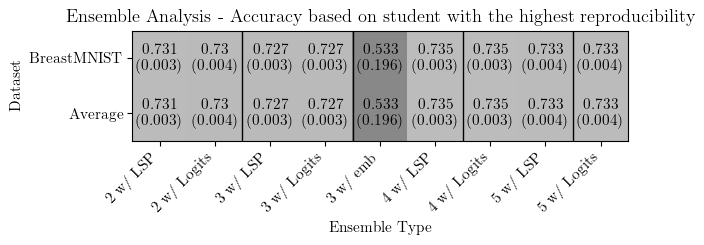

In [99]:
import matplotlib.pyplot as plt
import numpy as np

# Change the order of the DataFrame columns
column_order = [4, 0, 5, 1, 8, 6, 2, 7, 3]
df_ordered = df_acuracy.iloc[:, column_order]
df_std_ordered = df_var.iloc[:, column_order]
# Create a white heatmap with a grayscale colormap
plt.imshow(df_ordered.values, cmap='gray', extent=[-0.5, df_ordered.shape[1] - 0.5, -0.5, df_ordered.shape[0] - 0.5], vmin=0, vmax=1)
    
# Iterate over the DataFrame and highlight the maximum value for each pair in the "Average" row
for i in range(df_ordered.shape[0]):
    for j in range(df_ordered.shape[1]):
        value = round(df_ordered.values[i, j], 3)  # Round to 3 significant figures
        std = round(df_std_ordered.values[i, j], 3)  # Round standard deviation to 3 significant figures
        if i == 4 and value in max_values:
            plt.text(j, i, f'{value}\n({std})', ha='center', va='center', color='black', weight='bold')
        else:
            plt.text(j, i, f'{value}\n({std})', ha='center', va='center', color='black')

# Add vertical lines spaced 2 cells apart
for j in range(1, df_ordered.shape[1], 2):
    plt.axvline(j + 0.5, color='black', linewidth=1)  # Add a vertical line in the middle of each pair


plt.gca().invert_yaxis()  # Reverse the y-axis

# Add custom labels to the y-axis
labels = ['BreastMNIST', 'Average']
plt.yticks(range(df_ordered.shape[0]), labels)

# Add custom labels to the x-axis
x_ticks = [ '2 w/ LSP', '2 w/ Logits', '3 w/ LSP','3 w/ Logits', '3 w/ emb', '4 w/ LSP', '4 w/ Logits', '5 w/ LSP', '5 w/ Logits']
plt.xticks(range(df_ordered.shape[1]), x_ticks, rotation=45, ha='right')

# Add title and axis labels
plt.title('Ensemble Analysis - Accuracy based on student with the highest reproducibility')
plt.xlabel('Ensemble Type')
plt.ylabel('Dataset')

if not os.path.exists(SAVE_DIR_FIGS+"ensemble_results/"):
    os.makedirs(SAVE_DIR_FIGS+"ensemble_results/")
plt.savefig(SAVE_DIR_FIGS+"ensemble_results/"+'Ensemble Analysis - Accuracy based on student with the weighted reproducibility'+".png", dpi=150,bbox_inches='tight')

plt.show()

In [100]:
df_ordered*100

,3 w/ emb,2 w/ LSP,4 w/ LSP,2 w/ Logits,5 w/ Logits,4 w/ Logits,3 w/ LSP,5 w/ LSP,3 w/ Logits
0,73.051282,73.004274,72.683761,72.739316,53.32906,73.495726,73.452991,73.303419,73.286325
1,73.051282,73.004274,72.683761,72.739316,53.32906,73.495726,73.452991,73.303419,73.286325


## HOW TO PICK THE BEST STUDENT 

In [224]:
from models_config.model_config_GSP import *

analysis_type="model_assessment"
dataset = "gender_data"
dataset_split="val"
models_args=[
    gcn_student_lsp_ensamble_2_args,
    gcn_student_lsp_ensamble_3_args,
    gcn_student_lsp_ensamble_4_args,
    gcn_student_lsp_ensamble_5_args
]

all_model_metrics_mean = []
all_model_metrics_var = []
all_model_best_student = []

for model_arg in models_args:
    
    print(model_arg["model_name"])

    model_metrics_mean = []
    model_metrics_var = []
    model_best_student = []

    for view in [0,2,4,5]:
        mean, var, best_students = get_best_student_ensamble_detailed(
            model=model_arg["model_name"], 
            view=view, 
            CV=["3Fold", "5Fold", "10Fold"],
            runs=[i for i in range(10)], 
            analysis_type=analysis_type,
            dataset_split=dataset_split,
            model_args=model_arg
        )
        print(best_students)
        model_metrics_mean.append(mean)
        model_metrics_var.append(var)
        model_best_student.append(best_students)

    all_model_metrics_mean.append(model_metrics_mean)
    all_model_metrics_var.append(model_metrics_var)
    all_model_best_student.append(model_best_student)


gcn_student_lsp_ensamble_2
[[0.9384722222222223, 0.00025889274691358056, 1], [0.9383333333333332, 0.0003453703703703699, 0], [0.9384722222222223, 0.00025889274691358056, 1], [0.9383333333333332, 0.0003453703703703699, 0], [0.9384722222222223, 0.00025889274691358056, 1]]
[[0.9444444444444444, 0.00037461419753086217, 0], [0.8927777777777777, 0.0002483796296296277, 1], [0.8927777777777777, 0.0002483796296296277, 1], [0.9444444444444444, 0.00037461419753086217, 0], [0.8927777777777777, 0.0002483796296296277, 1]]
[[0.9579166666666667, 0.00031059027777777855, 1], [0.9579166666666667, 0.00031059027777777855, 1], [0.9579166666666667, 0.00031059027777777855, 1], [0.9579166666666667, 0.00031059027777777855, 1], [0.9579166666666667, 0.00031059027777777855, 1]]
[[0.9577777777777777, 0.0002234567901234572, 0], [0.9330555555555555, 0.0003340277777777791, 1], [0.9330555555555555, 0.0003340277777777791, 1], [0.9330555555555555, 0.0003340277777777791, 1], [0.9330555555555555, 0.0003340277777777791, 1]]

In [225]:
#Model, view, how to pick, [rep, std, index]

df_best_student = np.array(all_model_best_student)
df = []
for i in range(4):
    df.append(df_best_student[:, i, :, 0].flatten())
df = pd.DataFrame(np.array(df))
# Calculate the mean of columns
mean_row = df.mean(axis=0)

# Append the mean row to the DataFrame
df = df.append(mean_row, ignore_index=True).T
index_values = ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'] * (len(df) // 5) + ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'][:len(df) % 5]

# Assign the new index to the DataFrame
df.index = index_values
df

,0,1,2,3,4
max rep,0.938472,0.944444,0.957917,0.957778,0.949653
max acc,0.938333,0.892778,0.957917,0.933056,0.930521
max f1,0.938472,0.892778,0.957917,0.933056,0.930556
weighted acc,0.938333,0.944444,0.957917,0.933056,0.943437
weighted f1,0.938472,0.892778,0.957917,0.933056,0.930556
max rep,0.969028,0.931944,0.966667,0.956111,0.955937
max acc,0.968333,0.896667,0.932222,0.921667,0.929722
max f1,0.968333,0.896667,0.966667,0.921667,0.938333
weighted acc,0.968333,0.931944,0.966667,0.921667,0.947153
weighted f1,0.968333,0.896667,0.966667,0.921667,0.938333


In [226]:
index = df_best_student[:,:,:,2]
all_data_accuracy = []
for view_index in range(4):
    view_data = []
    ensamble_indexes = index[:,view_index,:]
    ensamble_data = np.array(all_model_metrics_mean)[:,view_index]
    #number of ensembles 
    for i in range(4):
        view_data.append([ensamble_data[i][int(best_student_index)][0] for best_student_index in ensamble_indexes[i]])
    all_data_accuracy.append(np.array(view_data).flatten())


In [227]:
df_acuracy = pd.DataFrame(np.array(all_data_accuracy))
# Calculate the mean of columns
mean_row = df_acuracy.mean(axis=0)

# Append the mean row to the DataFrame
df_acuracy = df_acuracy.append(mean_row, ignore_index=True).T
# Create the list of repeating index values
index_values = ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'] * (len(df_acuracy) // 5) + ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'][:len(df_acuracy) % 5]

# Assign the new index to the DataFrame
df_acuracy.index = index_values
df_acuracy

,0,1,2,3,4
max rep,0.534988,0.600378,0.653475,0.600888,0.597432
max acc,0.563876,0.636689,0.653475,0.633602,0.621910
max f1,0.534988,0.636689,0.653475,0.633602,0.614688
weighted acc,0.563876,0.600378,0.653475,0.633602,0.612833
weighted f1,0.534988,0.636689,0.653475,0.633602,0.614688
max rep,0.533604,0.601620,0.641890,0.588522,0.591409
max acc,0.611339,0.625489,0.653350,0.634708,0.631222
max f1,0.611339,0.625489,0.641890,0.634708,0.628357
weighted acc,0.611339,0.601620,0.641890,0.634708,0.622390
weighted f1,0.611339,0.625489,0.641890,0.634708,0.628357


In [228]:
from models_config.model_config_BreastMNIST import *

analysis_type="model_assessment"
dataset = "BreastMNIST"
dataset_split="val"
models_args=[
    gcn_student_lsp_ensamble_2_BreastMNIST_args,
    gcn_student_lsp_ensamble_3_BreastMNIST_args,
    gcn_student_lsp_ensamble_4_BreastMNIST_args,
    gcn_student_lsp_ensamble_5_BreastMNIST_args
]
views = [-1]
all_model_metrics_mean = []
all_model_metrics_var = []
all_model_best_student = []

for model_arg in models_args:
    
    print(model_arg["model_name"])

    model_metrics_mean = []
    model_metrics_var = []
    model_best_student = []

    for view in [-1]:
        mean, var, best_students = get_best_student_ensamble_detailed(
            model=model_arg["model_name"], 
            view=view, 
            CV=["3Fold", "5Fold", "10Fold"],
            runs=[i for i in range(10)], 
            analysis_type=analysis_type,
            dataset_split=dataset_split,
            model_args=model_arg,
            dataset=dataset
        )
        print(best_students)
        model_metrics_mean.append(mean)
        model_metrics_var.append(var)
        model_best_student.append(best_students)

    all_model_metrics_mean.append(model_metrics_mean)
    all_model_metrics_var.append(model_metrics_var)
    all_model_best_student.append(model_best_student)


gcn_student_lsp_ensamble_2
[[0.9445833333333334, 0.0003821180555555545, 1], [0.9445833333333334, 0.0003821180555555545, 1], [0.9445833333333334, 0.0003821180555555545, 1], [0.9445833333333334, 0.0003821180555555545, 1], [0.9445833333333334, 0.0003821180555555545, 1]]
gcn_student_lsp_ensamble_3
[[0.9675, 0.00020995370370370498, 1], [0.9675, 0.00020995370370370498, 1], [0.9675, 0.00020995370370370498, 1], [0.9675, 0.00020995370370370498, 1], [0.9675, 0.00020995370370370498, 1]]
gcn_student_lsp_ensamble_4
[[0.9541666666666666, 0.001069058641975308, 0], [0.9313888888888888, 0.0004128858024691338, 3], [0.9313888888888888, 0.0004128858024691338, 3], [0.9313888888888888, 0.0004128858024691338, 3], [0.9491666666666667, 0.00042330246913580396, 2]]
gcn_student_lsp_ensamble_5
[[0.9445833333333333, 0.0008747878086419745, 0], [0.9327777777777777, 0.0005614197530864196, 3], [0.9327777777777777, 0.0005614197530864196, 3], [0.9327777777777777, 0.0005614197530864196, 3], [0.9327777777777777, 0.00056141

In [239]:
#Model, view, how to pick, [rep, std, index]

df_best_student = np.array(all_model_best_student)
df_breastMNIST = []
for i in range(1):
    df_breastMNIST.append(df_best_student[:, i, :, 0].flatten())
df_breastMNIST = pd.DataFrame(np.array(df_breastMNIST))
# Calculate the mean of columns
mean_row = df_breastMNIST.mean(axis=0)

# Append the mean row to the DataFrame
df_breastMNIST = df_breastMNIST.append(mean_row, ignore_index=True).T
index_values = ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'] * (len(df_breastMNIST) // 5) + ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'][:len(df_breastMNIST) % 5]

# Assign the new index to the DataFrame
df_breastMNIST.index = index_values
df_breastMNIST

,0,1
max rep,0.944583,0.944583
max acc,0.944583,0.944583
max f1,0.944583,0.944583
weighted acc,0.944583,0.944583
weighted f1,0.944583,0.944583
max rep,0.967500,0.967500
max acc,0.967500,0.967500
max f1,0.967500,0.967500
weighted acc,0.967500,0.967500
weighted f1,0.967500,0.967500


In [240]:
index = df_best_student[:,:,:,2]
all_data_accuracy = []
for view_index in range(1):
    view_data = []
    ensamble_indexes = index[:,view_index,:]
    ensamble_data = np.array(all_model_metrics_mean)[:,view_index]
    #number of ensembles 
    for i in range(4):
        view_data.append([ensamble_data[i][int(best_student_index)][0] for best_student_index in ensamble_indexes[i]])
    all_data_accuracy.append(np.array(view_data).flatten())


In [243]:
df_acuracy_breastMNIST = pd.DataFrame(np.array(all_data_accuracy))
# Calculate the mean of columns
mean_row = df_acuracy.mean(axis=0)

# Append the mean row to the DataFrame
df_acuracy_breastMNIST = df_acuracy_breastMNIST.append(mean_row, ignore_index=True).T
# Create the list of repeating index values
index_values = ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'] * (len(df_acuracy_breastMNIST) // 5) + ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'][:len(df_acuracy_breastMNIST) % 5]

# Assign the new index to the DataFrame
df_acuracy_breastMNIST.index = index_values
df_acuracy_breastMNIST[0]

max rep         0.730513
max acc         0.730513
max f1          0.730513
weighted acc    0.730513
weighted f1     0.730513
max rep         0.726838
max acc         0.726838
max f1          0.726838
weighted acc    0.726838
weighted f1     0.726838
max rep         0.700256
max acc         0.734957
max f1          0.734957
weighted acc    0.734957
weighted f1     0.705470
max rep         0.708034
max acc         0.733034
max f1          0.733034
weighted acc    0.733034
weighted f1     0.733034
Name: 0, dtype: float64

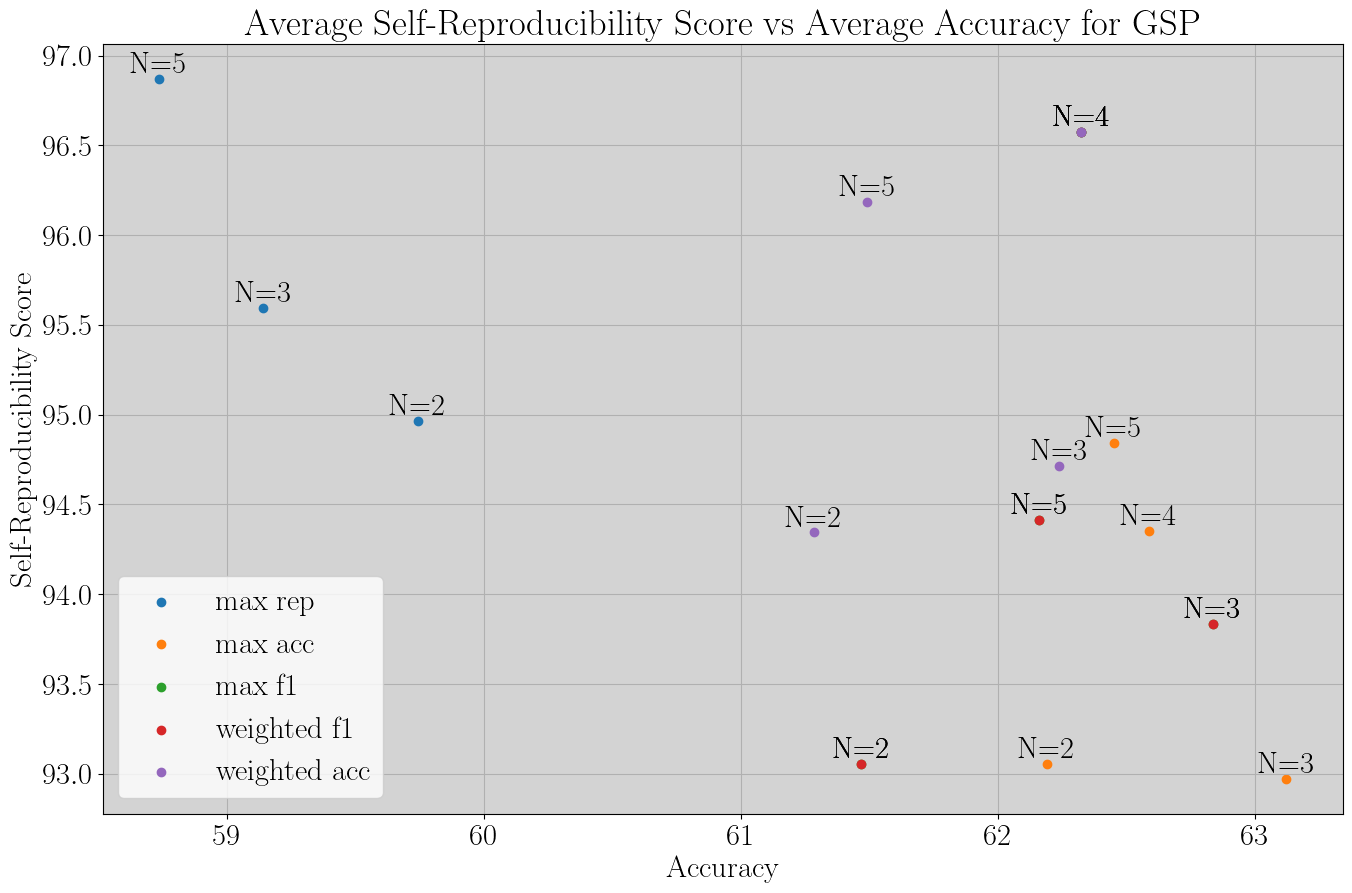

In [268]:
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]
params = {
    'text.usetex' : True,
    'font.size' : 22,
    'font.family' : 'lmodern'
}
plt.rcParams.update(params)
plt.rcParams['axes.facecolor'] = 'lightgrey'
plt.rcParams["figure.figsize"] = (16,10)
all_x = []
all_y = []

for method in ['max rep', 'max acc', 'max f1', 'weighted f1', 'weighted acc']:
    # Assuming you have two DataFrames: df1 and df2
    # Let's say you want to plot column 'A' from df1 against column 'B' from df2
    labels = ["2", "3", "4", "5"]
    # Extract the columns of interest from the DataFrames
    x, y = df_acuracy.loc[method][4]*100, df.loc[method][4]*100
    plt.scatter(x, y, label=method)

    # Add labels to each point
    for index, (i, j) in enumerate(zip(x, y)):
        plt.text(i, j, f'N={labels[index]}', ha='center', va='bottom')
    # Customize the plot
    plt.xlabel('Accuracy')  # Add x-axis label
    plt.ylabel('Self-Reproducibility Score')  # Add y-axis label
    plt.title(f'Average Self-Reproducibility Score vs Average Accuracy for GSP')  # Add title
    plt.grid()
    plt.legend(loc='lower left', facecolor='white')
    all_x.append(x)
    all_y.append(y)

plt.savefig('Average Self-Reproducibility Score vs Average Accuracy for varying ensemble size and selection method.pdf', format='pdf')

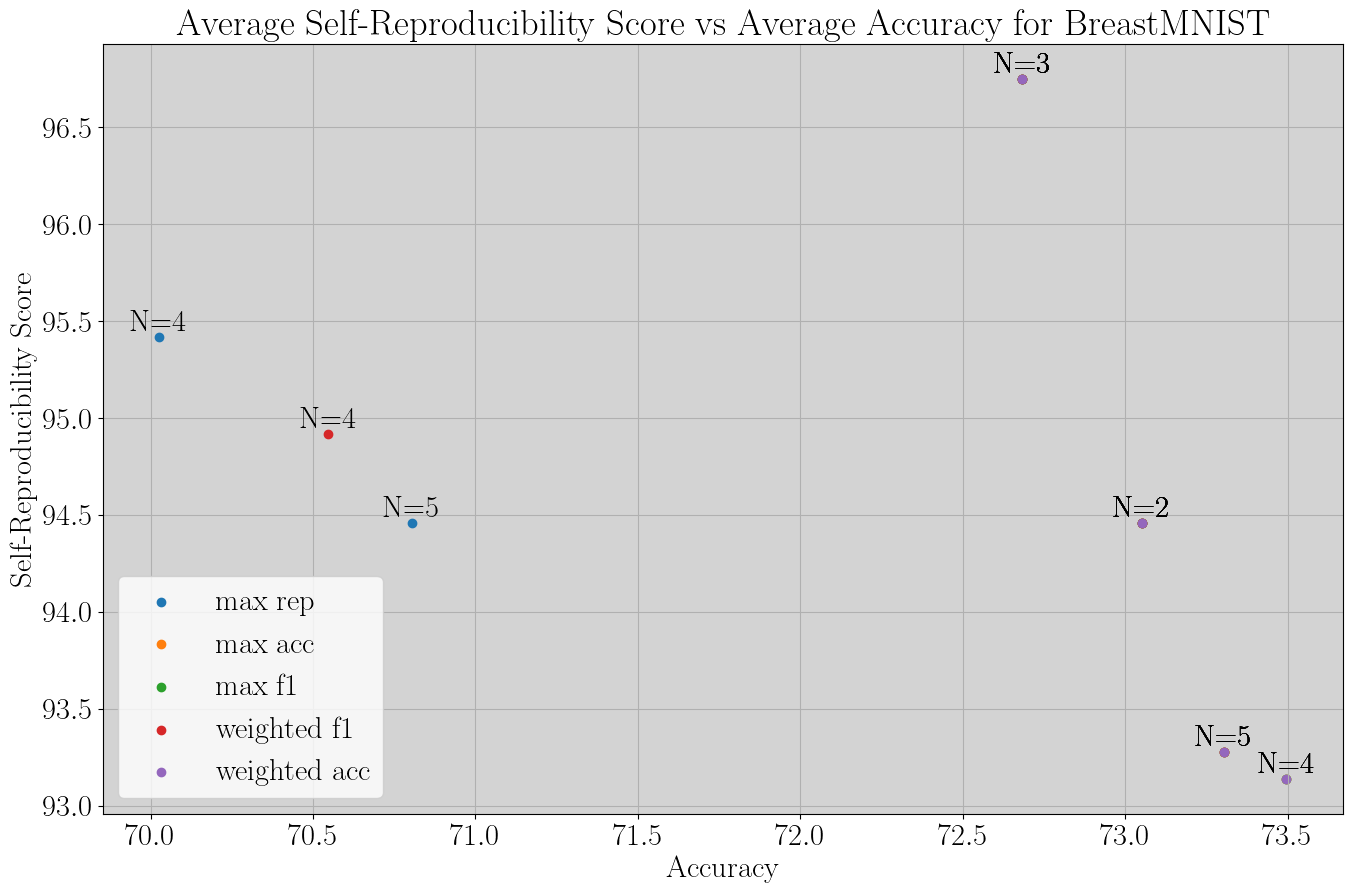

In [269]:
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]
params = {
    'text.usetex' : True,
    'font.size' : 22,
    'font.family' : 'lmodern'
}
plt.rcParams.update(params)
plt.rcParams['axes.facecolor'] = 'lightgrey'
plt.rcParams["figure.figsize"] = (16,10)
all_x = []
all_y = []

for method in ['max rep', 'max acc', 'max f1', 'weighted f1', 'weighted acc']:
    # Assuming you have two DataFrames: df1 and df2
    # Let's say you want to plot column 'A' from df1 against column 'B' from df2
    labels = ["2", "3", "4", "5"]
    # Extract the columns of interest from the DataFrames
    #x, y = df_acuracy.loc[method][4], df.loc[method][4]
    #plt.scatter(x, y)
    x, y = df_acuracy_breastMNIST.loc[method][0]*100, df_breastMNIST.loc[method][0]*100
    #Create the scatter plot
    plt.scatter(x, y, label=method)

    # Add labels to each point
    for index, (i, j) in enumerate(zip(x, y)):
        plt.text(i, j, f'N={labels[index]}', ha='center', va='bottom')
    # Customize the plot
    plt.xlabel('Accuracy')  # Add x-axis label
    plt.ylabel('Self-Reproducibility Score')  # Add y-axis label
    plt.title(f'Average Self-Reproducibility Score vs Average Accuracy for BreastMNIST')  # Add title
    plt.grid()
    plt.legend(loc='lower left', facecolor='white')
    all_x.append(x)
    all_y.append(y)

plt.savefig('Average Self-Reproducibility Score vs Average Accuracy for varying ensemble size and selection method for BreastMNIST.pdf', format='pdf')